In [30]:
%matplotlib inline

In [31]:
import os
import gym

import pygame
import math
import random
import numpy as np
from collections import namedtuple
from itertools import count
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import pkg_resources
import time
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../'))
from dqn_util import *

# pkg_resources.get_distribution("gym").version

In [32]:
from gym.wrappers.human_rendering import HumanRendering
from gym.envs.toy_text.frozen_lake import generate_random_map

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

env = gym.make("Boxing-v4", render_mode="rgb_array", full_action_space=False).unwrapped

# wrapped = HumanRendering(env)
# wrapped.reset()

resize = T.Compose([ T.ToPILImage(),
                    T.Grayscale(),
                    T.Resize(40, interpolation=Image.CUBIC),
                    T.ToTensor(),
                    ])

device

C:\Users\xande\AppData\Local\Temp\ipykernel_14612\1970223997.py:13: DeprecationWarning: CUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  T.Resize(40, interpolation=Image.CUBIC),
c:\Users\xande\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


device(type='cuda')

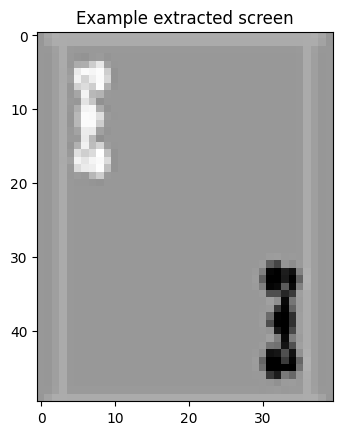

In [33]:
env.reset()

def get_screen():
    screen = env.render().transpose((2, 0, 1))  # transpose into torch order (CHW)
    _, screen_height, screen_width = screen.shape

    screen = screen[:,30:180, 20:140]

    # Convert to float, rescare, convert to torch tensor (this doesn't require a copy)
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    # Resize, and add a batch dimension (BCHW)
    return resize(screen).unsqueeze(0).to(device)


plt.figure()
example_screen = get_screen()
# print(f"shape of screen: {screen.example_screen}")
plt.imshow(example_screen.cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none', cmap='gray')
plt.title('Example extracted screen')
plt.show()



In [36]:
def select_action(state):
    return policy_net(state).max(1)[1].view(1, 1)

In [41]:
def testIters(policy_net, n_iters=60):
    
    for iteration in range(n_iters):

        # wrapped = HumanRendering(env)

        # Initialize the environment and state
        env.reset()
        # wrapped.reset()
        state = get_screen()
        done = False
        while not done:
            env.render()
            # wrapped._render_frame()

            action = select_action(state)
            _, reward, done, _, _ = env.step(action.item())
            if reward != 0:
                print("reward:", reward)
            if not done:
                # 1 beeld
                next_state = get_screen()

            else:
                next_state = None

            # Move to the next state
            state = next_state


    print('Complete')
    # wrapped.render()
    # wrapped.close()

    env.render()
    env.close()


In [ ]:
if __name__ == "__main__":

    # Get screen size so that we can initialize layers correctly based on shape
    # returned from AI gym. 

    init_screen = get_screen()
    _, _, screen_height, screen_width = init_screen.shape

    # Get number of actions from gym action space
    n_actions = env.action_space.n
    print(n_actions)
    policy_net = torch.load('./model/boxing_2400000.pkl')
    print('Model loaded')
    testIters(policy_net, n_iters=5)


